In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #for visualisation
import seaborn as sns #for visualisation
%matplotlib inline
import descartes
import geopandas



In [40]:
df=pd.read_csv("/Users/vanshikamishra/Downloads/HospInfo.csv")

In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 29 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Provider ID                                                    4807 non-null   int64  
 1   Hospital Name                                                  4807 non-null   object 
 2   Address                                                        4807 non-null   object 
 3   City                                                           4807 non-null   object 
 4   State                                                          4807 non-null   object 
 5   ZIP Code                                                       4807 non-null   int64  
 6   County Name                                                    4792 non-null   object 
 7   Phone Number                                                

# Hospital with rating of 5

# Acute Care Hospitals with 5 star rating


In [42]:
acute_1=df.loc[(df['Hospital Type']=='Acute Care Hospitals')& (df['Hospital overall rating']=='5'),['State']]



In [43]:
acute_2=acute_1['State'].value_counts()

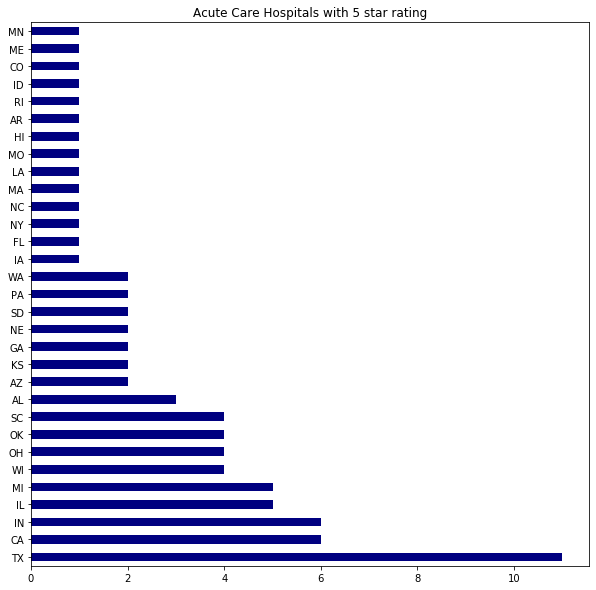

In [44]:
acute_2.plot(kind='barh',colormap='jet',title='Acute Care Hospitals with 5 star rating',figsize=(10,10))

# Criticial access Hospitals with 5 star rating

In [37]:
critical_1=df.loc[(df['Hospital Type']=='Critical Access Hospitals')& (df['Hospital overall rating']=='5'),['State']]


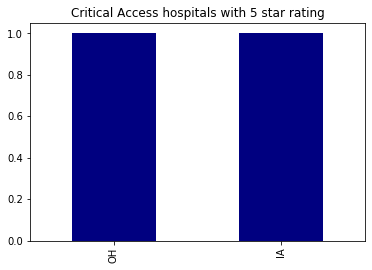

In [36]:
critical_1['State'].value_counts().plot(kind='bar',colormap='jet',title="Critical Access hospitals with 5 star rating")

# Childrens Hospitals with 5 star rating

In [38]:
child_1=df.loc[(df['Hospital Type']=='Childrens Hospitals')& (df['Hospital overall rating']=='5'),['State']]



In [47]:
child_1['State'].value_counts()


Series([], Name: State, dtype: int64)

There are no hospitals(childrens)with rating of 5

# Hospitals with a rating of 1

# There are no hospitals with a rating of 5

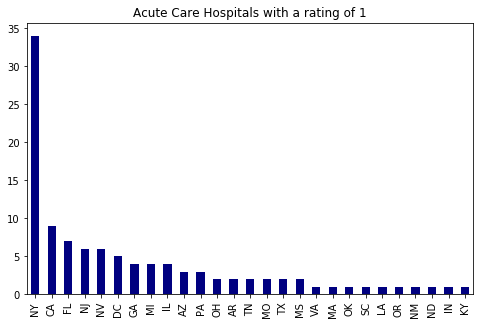

In [56]:

acute_2=df.loc[(df['Hospital Type']=='Acute Care Hospitals') & (df['Hospital overall rating']=='1'),['State']]
acute_2['State'].value_counts().plot(kind='bar',title="Acute Care Hospitals with a rating of 1",colormap='jet',figsize=(8,5))

# Critical access Hospitals with a rating of 1

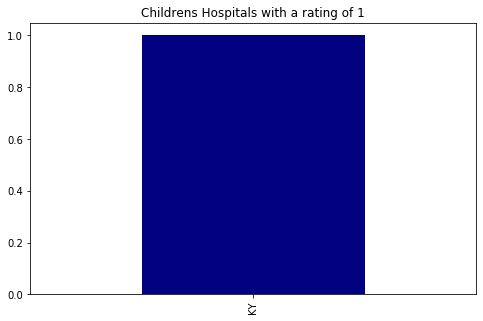

In [58]:

critical_2=df.loc[(df['Hospital Type']=='Critical Access Hospitals') & (df['Hospital overall rating']=='1'),['State']]
critical_2['State'].value_counts().plot(kind='bar',title="Childrens Hospitals with a rating of 1",colormap='jet',figsize=(8,5))

Kentucky is the only state with a raitng of 1 being a childrens Hospital

In [ ]:
#replacing Patient experience national comparison with numeric values
df=df.replace('Below the National average',1)
df=df.replace('Same as the National average',2)
df=df.replace('Above the National average',3)

In [21]:
#converting all 'Not available'to Nan
df=df.replace('Not Available',np.nan)

In [22]:
df.tail()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
4802,670114,WEIMAR MEDICAL CENTER,400 YOUENS DR,WEIMAR,TX,78962,COLORADO,9797258274,Acute Care Hospitals,Proprietary,...,Results are not available for this reporting p...,NaN,Results are not available for this reporting p...,NaN,Results are not available for this reporting p...,NaN,Results are not available for this reporting p...,NaN,Results are not available for this reporting p...,NaN
4803,640001,LBJ TROPICAL MEDICAL CENTER,FAGAALU VILLAGE,PAGO PAGO,AS,96799,NaN,6846334590,Acute Care Hospitals,Government - Hospital District or Authority,...,Results are not available for this reporting p...,NaN,Results are not available for this reporting p...,NaN,Results are not available for this reporting p...,NaN,Results are not available for this reporting p...,NaN,Results are not available for this reporting p...,NaN
4804,650001,GUAM MEMORIAL HOSPITAL AUTHORITY,85O GOV CARLOS G CAMACHO ROAD,TAMUNING,GU,96913,NaN,6716472552,Acute Care Hospitals,Government - Local,...,NaN,NaN,Results are not available for this reporting p...,2.0,NaN,NaN,Results are not available for this reporting p...,NaN,Results are not available for this reporting p...,NaN
4805,650003,GUAM REGIONAL MEDICAL CITY,133 ROUTE 3,DEDEDO,GU,96929,NaN,6716455500,Acute Care Hospitals,Voluntary non-profit - Private,...,Data are shown only for hospitals that partici...,NaN,Data are shown only for hospitals that partici...,NaN,Data are shown only for hospitals that partici...,NaN,Data are shown only for hospitals that partici...,NaN,Data are shown only for hospitals that partici...,NaN
4806,660001,COMMONWEALTH HEALTH CENTER,"PO BOX 409CK, NAVY HILL ROAD",GARAPAN,MP,96950,NaN,6702348950,Acute Care Hospitals,Proprietary,...,NaN,NaN,Results are not available for this reporting p...,NaN,Results are not available for this reporting p...,NaN,Results are not available for this reporting p...,NaN,Results are not available for this reporting p...,NaN


# converting data types to numeric

In [23]:

df['Mortality national comparison'] = pd.to_numeric(df['Mortality national comparison'])
df['Safety of care national comparison'] = pd.to_numeric(df['Safety of care national comparison'])
df['Readmission national comparison'] = pd.to_numeric(df['Readmission national comparison'])
df['Patient experience national comparison'] = pd.to_numeric(df['Patient experience national comparison'])
df['Mortality national comparison'] =pd.to_numeric(df['Mortality national comparison'])
df['Hospital overall rating'] = pd.to_numeric(df['Hospital overall rating'])



# Number of Hospitals per State

In [24]:
hospital_count=df['State'].value_counts()

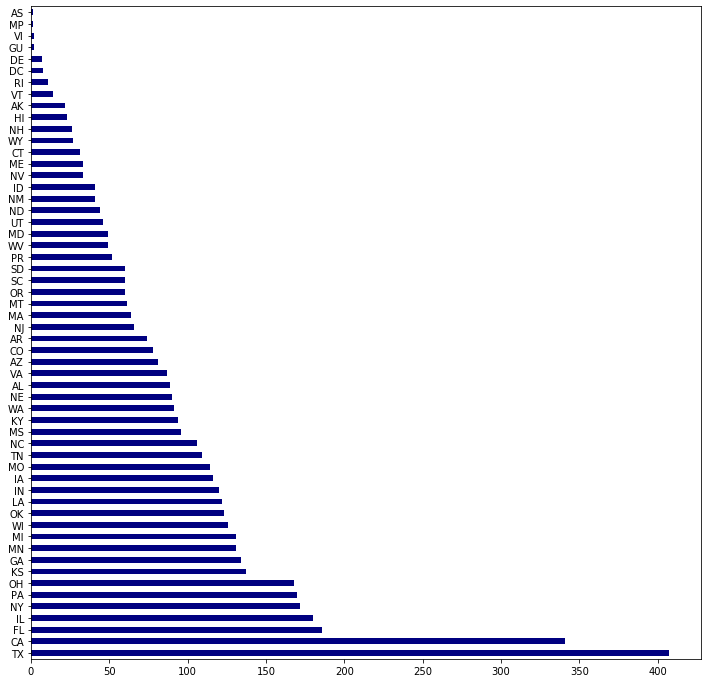

In [25]:
hospital_count.plot(kind='barh',colormap='jet',figsize=(12,12))

 From the above barplot, we can see that Texas has the maximum number of hospitals along with other top states in the Top 10! We can notice that American Samoa (AS), District of Columbia(DC), Guam(GU), Virgin Islands(VI), Northern Mariana Islands(MP) have very low number of hospitals and thus the state of healthcare in these states must be very poor!



# Checking Ownership of the hospitals
Let us check how many hospitals are owned by a particular individual or government and others.

In [26]:
own=df['Hospital Ownership'].value_counts().drop_duplicates()
own.to_frame()



,Hospital Ownership
Voluntary non-profit - Private,2037
Proprietary,796
Government - Hospital District or Authority,566
Voluntary non-profit - Other,473
Government - Local,406
Voluntary non-profit - Church,344
Government - State,67
Physician,64
Government - Federal,46
Tribal,8


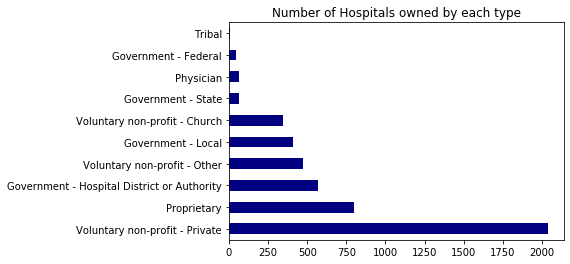

In [27]:
#converting series to pandas dataframe 
own.plot(kind='barh',title="Number of Hospitals owned by each type",colormap='jet')

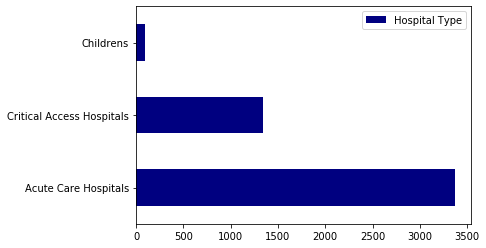

In [28]:

hospital_types=df['Hospital Type'].value_counts()
hospital_types.drop_duplicates()
hospital_types2=hospital_types.to_frame()
hospital_types2.plot(kind='barh',colormap='jet')

# Rating of types of hospitals under different types of hospital onwnership

In [29]:
#rating of types of hospitals under different types of hospital onwnership
rating=pd.pivot_table(df,values=['Hospital overall rating'],index=df['Hospital Ownership'],columns=df['Hospital Type'],aggfunc='count',margins=False)

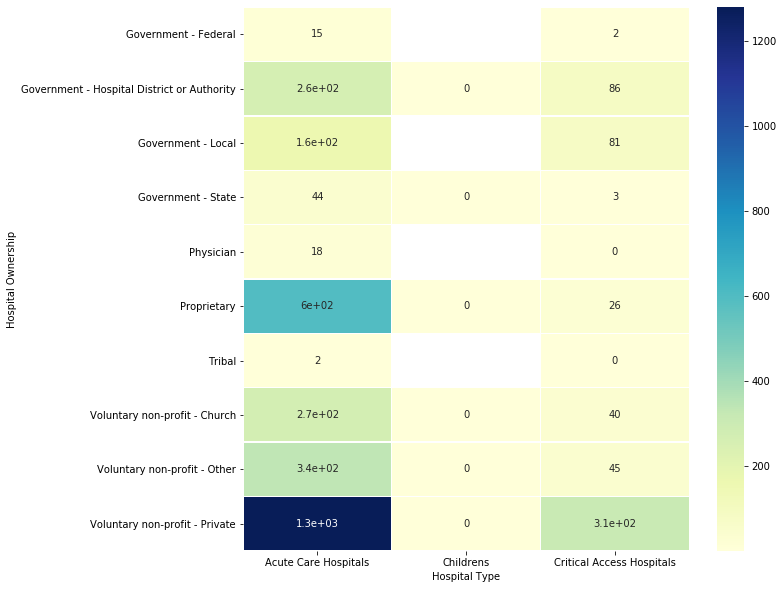

In [30]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(rating['Hospital overall rating'],linewidths=0.5,annot=True,vmin=0.01,cmap='YlGnBu')
ax.xlabel="Rating for types of hospitals for different Hospital Ownerships"

# Categorising hospitals w.r.t their ratings


In [54]:
df['Hospital overall rating'].unique()

array([ 3.,  2., nan,  4.,  5.,  1.])

In [55]:
sorted_rating=df.sort_values(['Hospital overall rating'], ascending=False)
sorted_rating[['Hospital Name','Hospital overall rating']].head()

,Hospital Name,Hospital overall rating
1361,ST VINCENT CARMEL HOSPITAL INC,5.0
65,LAKELAND COMMUNITY HOSPITAL,5.0
1076,ST LUKE'S REGIONAL MEDICAL CENTER,5.0
76,BAPTIST MEDICAL CENTER EAST,5.0
4454,UNIVERSITY OF WASHINGTON MEDICAL CTR,5.0


In [67]:
rating=df['Hospital overall rating'].value_counts().to_frame()

rating2=rating.sort_index(axis = 0) 
rating2

,Hospital overall rating
1.0,108
2.0,679
3.0,1774
4.0,941
5.0,82


Text(0, 0.5, 'Number of Hospitals')

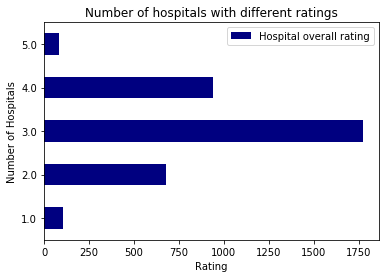

In [68]:
ax=rating2.plot(kind='barh',title="Number of hospitals with different ratings",colormap='jet')
plt.xlabel('Rating')
plt.ylabel('Number of Hospitals')


In [80]:
#take care of error
np.arange(5) == np.arange(5).astype(str)

/Users/vanshikamishra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


False

Here, we can see that there are majority hospitals with 3-star rating. There are very little hospitals with extreme ratings i.e 1 or 5

# Average hospital rating by state


In [42]:
clean=df.drop(df[df['Hospital overall rating']=='Not Available'].index)
clean['Hospital overall rating']=clean['Hospital overall rating'].astype(float)
clean.groupby('State')['Hospital overall rating'].mean()




State
AK    2.888889
AL    3.050633
AR    2.836364
AS         NaN
AZ    2.945455
CA    2.841379
CO    3.450980
CT    2.714286
DC    1.428571
DE    3.666667
FL    2.658824
GA    2.936364
GU    3.000000
HI    3.307692
IA    3.394366
ID    3.526316
IL    3.132075
IN    3.481481
KS    3.344828
KY    2.975904
LA    3.125000
MA    3.192982
MD         NaN
ME    3.437500
MI    3.191304
MN    3.531646
MO    3.011628
MP         NaN
MS    2.777778
MT    3.347826
NC    3.106383
ND    3.187500
NE    3.285714
NH    3.480000
NJ    2.546875
NM    2.709677
NV    2.423077
NY    2.311688
OH    3.378571
OK    3.144578
OR    3.153846
PA    3.006757
PR    2.111111
RI    3.272727
SC    3.207547
SD    3.857143
TN    2.873684
TX    3.233083
UT    3.448276
VA    3.012987
VI    2.000000
VT    3.250000
WA    3.015152
WI    3.611111
WV    2.756757
WY    3.000000
Name: Hospital overall rating, dtype: float64

In [43]:
statewise_avarage_rating=clean.groupby('State')['Hospital overall rating'].mean().to_frame()
bar=statewise_avarage_rating.sort_values(['Hospital overall rating'])


Text(0.5, 0, 'Average Hospital Rating')

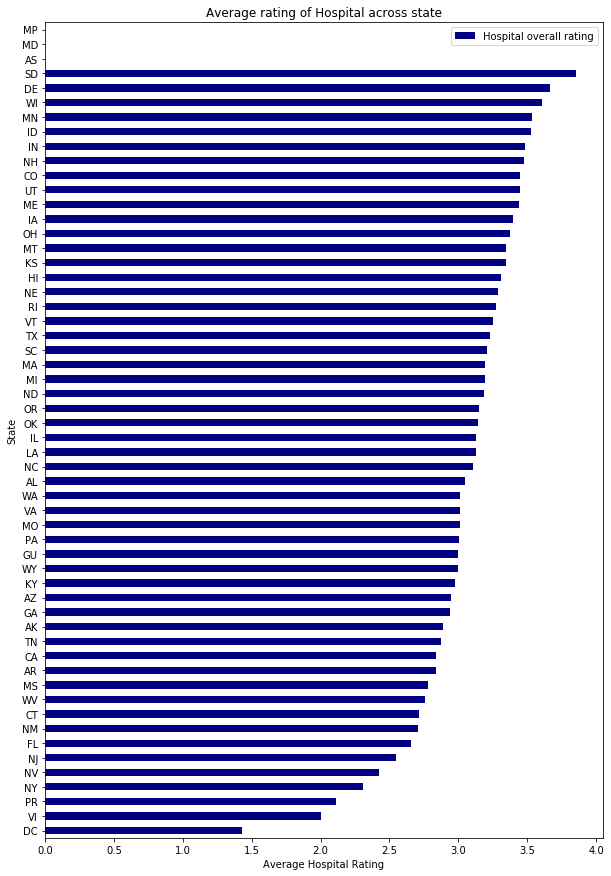

In [44]:
bar.plot(kind='barh',title="Average rating of Hospital across state"
                           ,figsize=(10,15),colormap='jet')
plt.xlabel('Average Hospital Rating')

# Hospital Ownership & Average Ratings

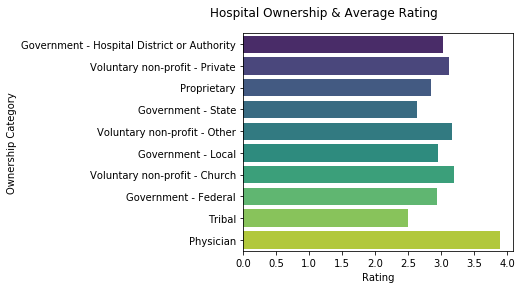

In [45]:
#Now let's explore what categories of hospital ownership recieve the best ratings.
sns.barplot(x='Hospital overall rating', y='Hospital Ownership', ci=0, data=df, palette="viridis")
plt.title('Hospital Ownership & Average Rating',x=.3, y=1.05)
plt.xlabel('Rating')
plt.ylabel('Ownership Category')
plt.subplots_adjust(right=.75)

In [46]:
#state hospital systems with mutiple ratings categories

df2=df.pivot_table(index=['State'], values = ['Hospital overall rating','Safety of care national comparison',
                    'Patient experience national comparison'], aggfunc='mean')
df3=pd.DataFrame(df2)
df3=df2.reset_index()
state_rating=df3.sort_values("Hospital overall rating", ascending = False).dropna()
state_rating.head()

,State,Hospital overall rating,Patient experience national comparison,Safety of care national comparison
42,SD,3.857143,2.705882,2.000000
8,DE,3.666667,2.000000,2.500000
50,WI,3.611111,2.720000,1.933333
23,MN,3.531646,2.617284,1.934783
14,ID,3.526316,2.320000,2.400000


/Users/vanshikamishra/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


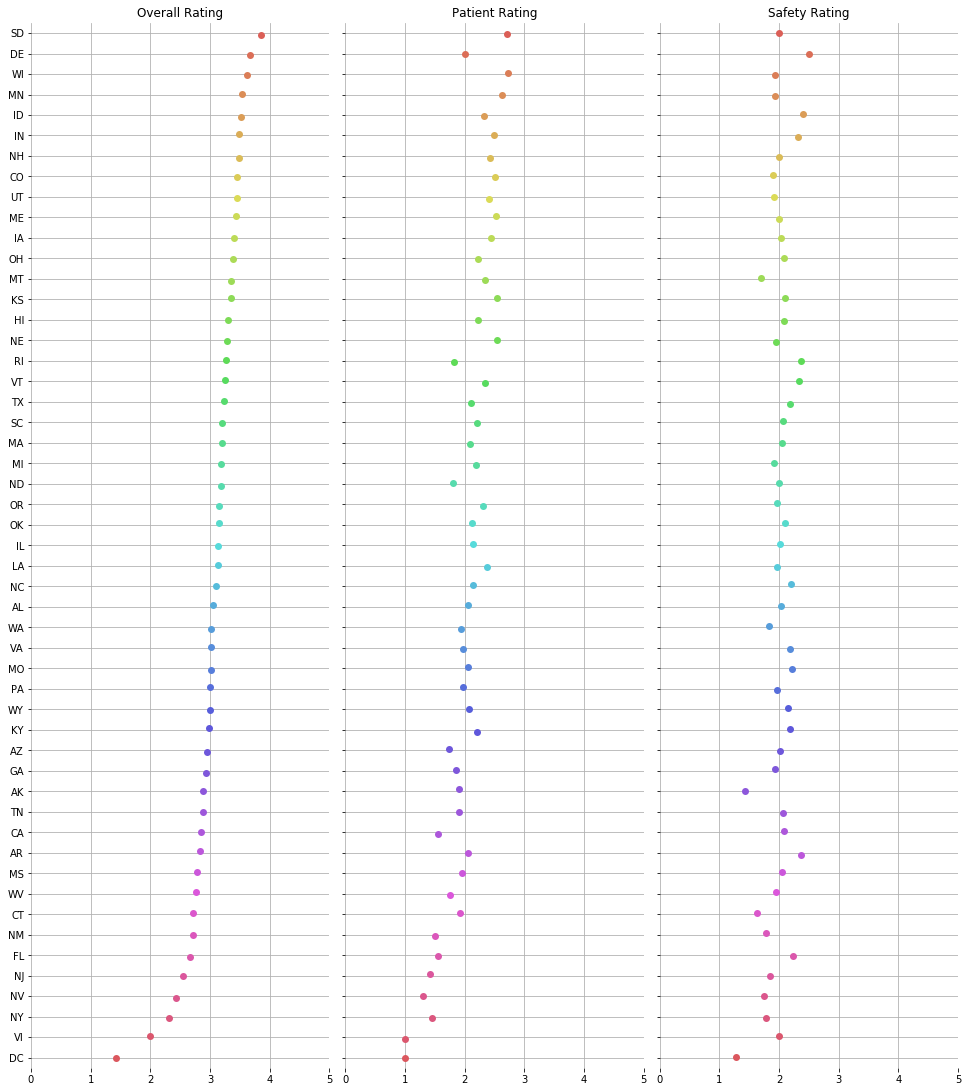

In [47]:
#state hospital systems with mutiple ratings categories
g=sns.PairGrid(state_rating,
              x_vars=['Hospital overall rating','Patient experience national comparison','Safety of care national comparison'],
               y_vars=['State'],size=15,aspect=.3)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=7, orient="h", palette="hls")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 5), xlabel="", ylabel="")

# Use semantically meaningful titles for the columns
titles = ['Overall Rating','Patient Rating','Safety Rating']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
   

sns.despine(left=True, bottom=True)


# Distribution of Hospital Ownership against Hospital Type

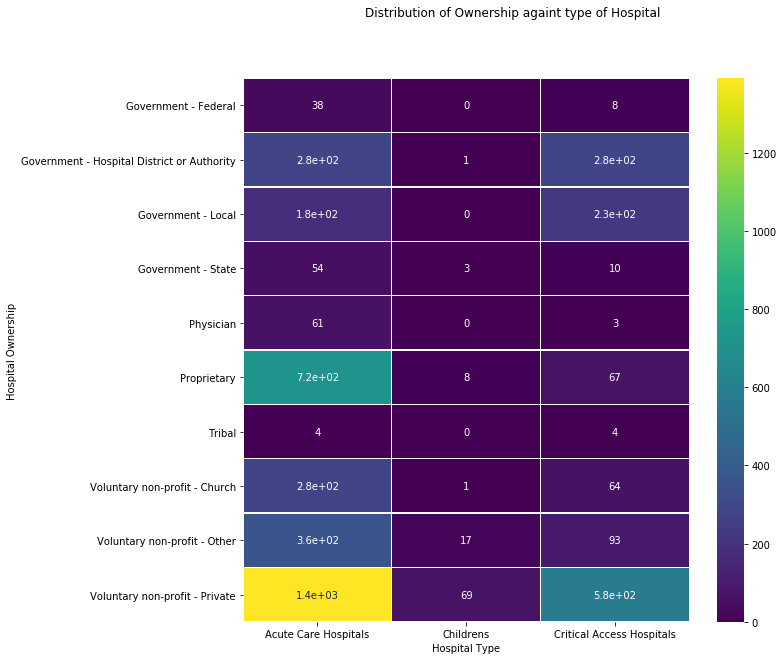

In [49]:
# Drawing a heatmap with the numeric values in each cell
plt.subplots(figsize=(10, 10))
plt.suptitle('Distribution of Ownership againt type of Hospital');
sns.heatmap(count_hospital, annot=True,linewidths=.2, cmap='viridis' );


